In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
import random
from sklearn.metrics import mean_squared_error, mean_absolute_error

# All

In [2]:
df_final = pd.read_parquet(r"C:\Users\fashaikh\Desktop\Thesis_main\final_v2.parquet")

#grouped = df_final.groupby('category').mean()

df_demo = pd.read_csv(r"C:\Users\fashaikh\Desktop\Thesis_main\thesis\acp_data\cleaned_demo.csv")

grouped = grouped.merge(df_demo, 'inner', right_on= 'Community', left_on='category')

In [3]:
grouped.drop(columns=['id', 'probability.negative', 'probability.neutral',
       'probability.positive', 'probability.anger', 'probability.anticipation',
       'probability.fear', 'probability.joy', 'probability.optimism',
       'probability.sadness', 'emotion_score',
       'Normalized_emotion_score', 'Community'], inplace=True)

In [16]:
grouped.describe()

Normalized_sentiment_score  Access to Exercise Opportunities  \
count                   15.000000                         15.000000   
mean                    -0.436397                          0.682447   
std                      0.077690                          0.180307   
min                     -0.559725                          0.417000   
25%                     -0.494288                          0.520050   
50%                     -0.447931                          0.678600   
75%                     -0.379378                          0.821200   
max                     -0.284632                          0.977900   

       Driving Alone to Work  Food Insecurity  \
count              15.000000        15.000000   
mean                0.782940         0.123233   
std                 0.036798         0.026021   
min                 0.712400         0.089000   
25%                 0.760300         0.102000   
50%                 0.790900         0.121000   
75%                 0.815000         0.140000   
max                 0.835600         0.169000   

       Limited Access to Healthy Foods  Long Commute - Driving Alone  \
count                        15.000000                     15.000000   
mean                          0.073020                      0.312433   
std                           0.037197                      0.076311   
min                           0.001000                      0.201000   
25%                           0.052150                      0.246750   
50%                           0.074800                      0.310000   
75%                           0.089600                      0.374250   
max                           0.168300                      0.435000   

       % 65 and Older  % American Indian or Alaska Native    % Asian  \
count       15.000000                           15.000000  15.000000   
mean         0.180053                            0.047873   0.017793   
std          0.036090                            0.151309   0.018455   
min          0.133100                            0.004000   0.005200   
25%          0.152450                            0.005550   0.006500   
50%          0.166500                            0.007100   0.008700   
75%          0.199250                            0.012800   0.021450   
max          0.259700                            0.594600   0.062600   

       % Below 18 Years of Age  ...  Voter Turnout  Child Care Cost Burden  \
count                 15.00000  ...      15.000000               15.000000   
mean                   0.23106  ...       0.656933                0.268673   
std                    0.03150  ...       0.066099                0.031625   
min                    0.17730  ...       0.540200                0.213900   
25%                    0.21810  ...       0.608950                0.253950   
50%                    0.22330  ...       0.663300                0.267300   
75%                    0.23405  ...       0.719750                0.289150   
max                    0.30470  ...       0.744700                0.332300   

       Children Eligible for Free or Reduced Price Lunch  Children in Poverty  \
count                                          15.000000            15.000000   
mean                                            0.554280             0.191933   
std                                             0.173865             0.066050   
min                                             0.348500             0.107500   
25%                                             0.437450             0.154250   
50%                                             0.503500             0.168000   
75%                                             0.620900             0.231750   
max                                             0.930100             0.332000   

       Children in Single-Parent Households  Gender Pay Gap  Homeownership  \
count                             15.000000       15.000000      15.000000   
mean                               0.2

In [17]:
grouped.columns

Index(['Normalized_sentiment_score', 'Access to Exercise Opportunities',
       'Driving Alone to Work', 'Food Insecurity',
       'Limited Access to Healthy Foods', 'Long Commute - Driving Alone',
       '% 65 and Older', '% American Indian or Alaska Native', '% Asian',
       '% Below 18 Years of Age', '% Female', '% Hispanic',
       '% Native Hawaiian or Other Pacific Islander', '% Non-Hispanic Black',
       '% Non-Hispanic White', '% Not Proficient in English', '% Rural',
       'Bachelor's degree', 'Census Participation', 'High School Completion',
       'High School Graduation', 'School Segregation', 'Adult Obesity',
       'Adult Smoking', 'Alcohol-Impaired Driving Deaths',
       'Diabetes Prevalence', 'Excessive Drinking', 'Flu Vaccinations',
       'Frequent Mental Distress', 'Frequent Physical Distress',
       'Insufficient Sleep', 'Low Birthweight', 'Mammography Screening',
       'Physical Inactivity', 'Poor or Fair Health', 'Uninsured Adults',
       'Uninsured Childre

In [4]:
to_predict = 'Normalized_sentiment_score'
numeric = grouped.columns[1:]

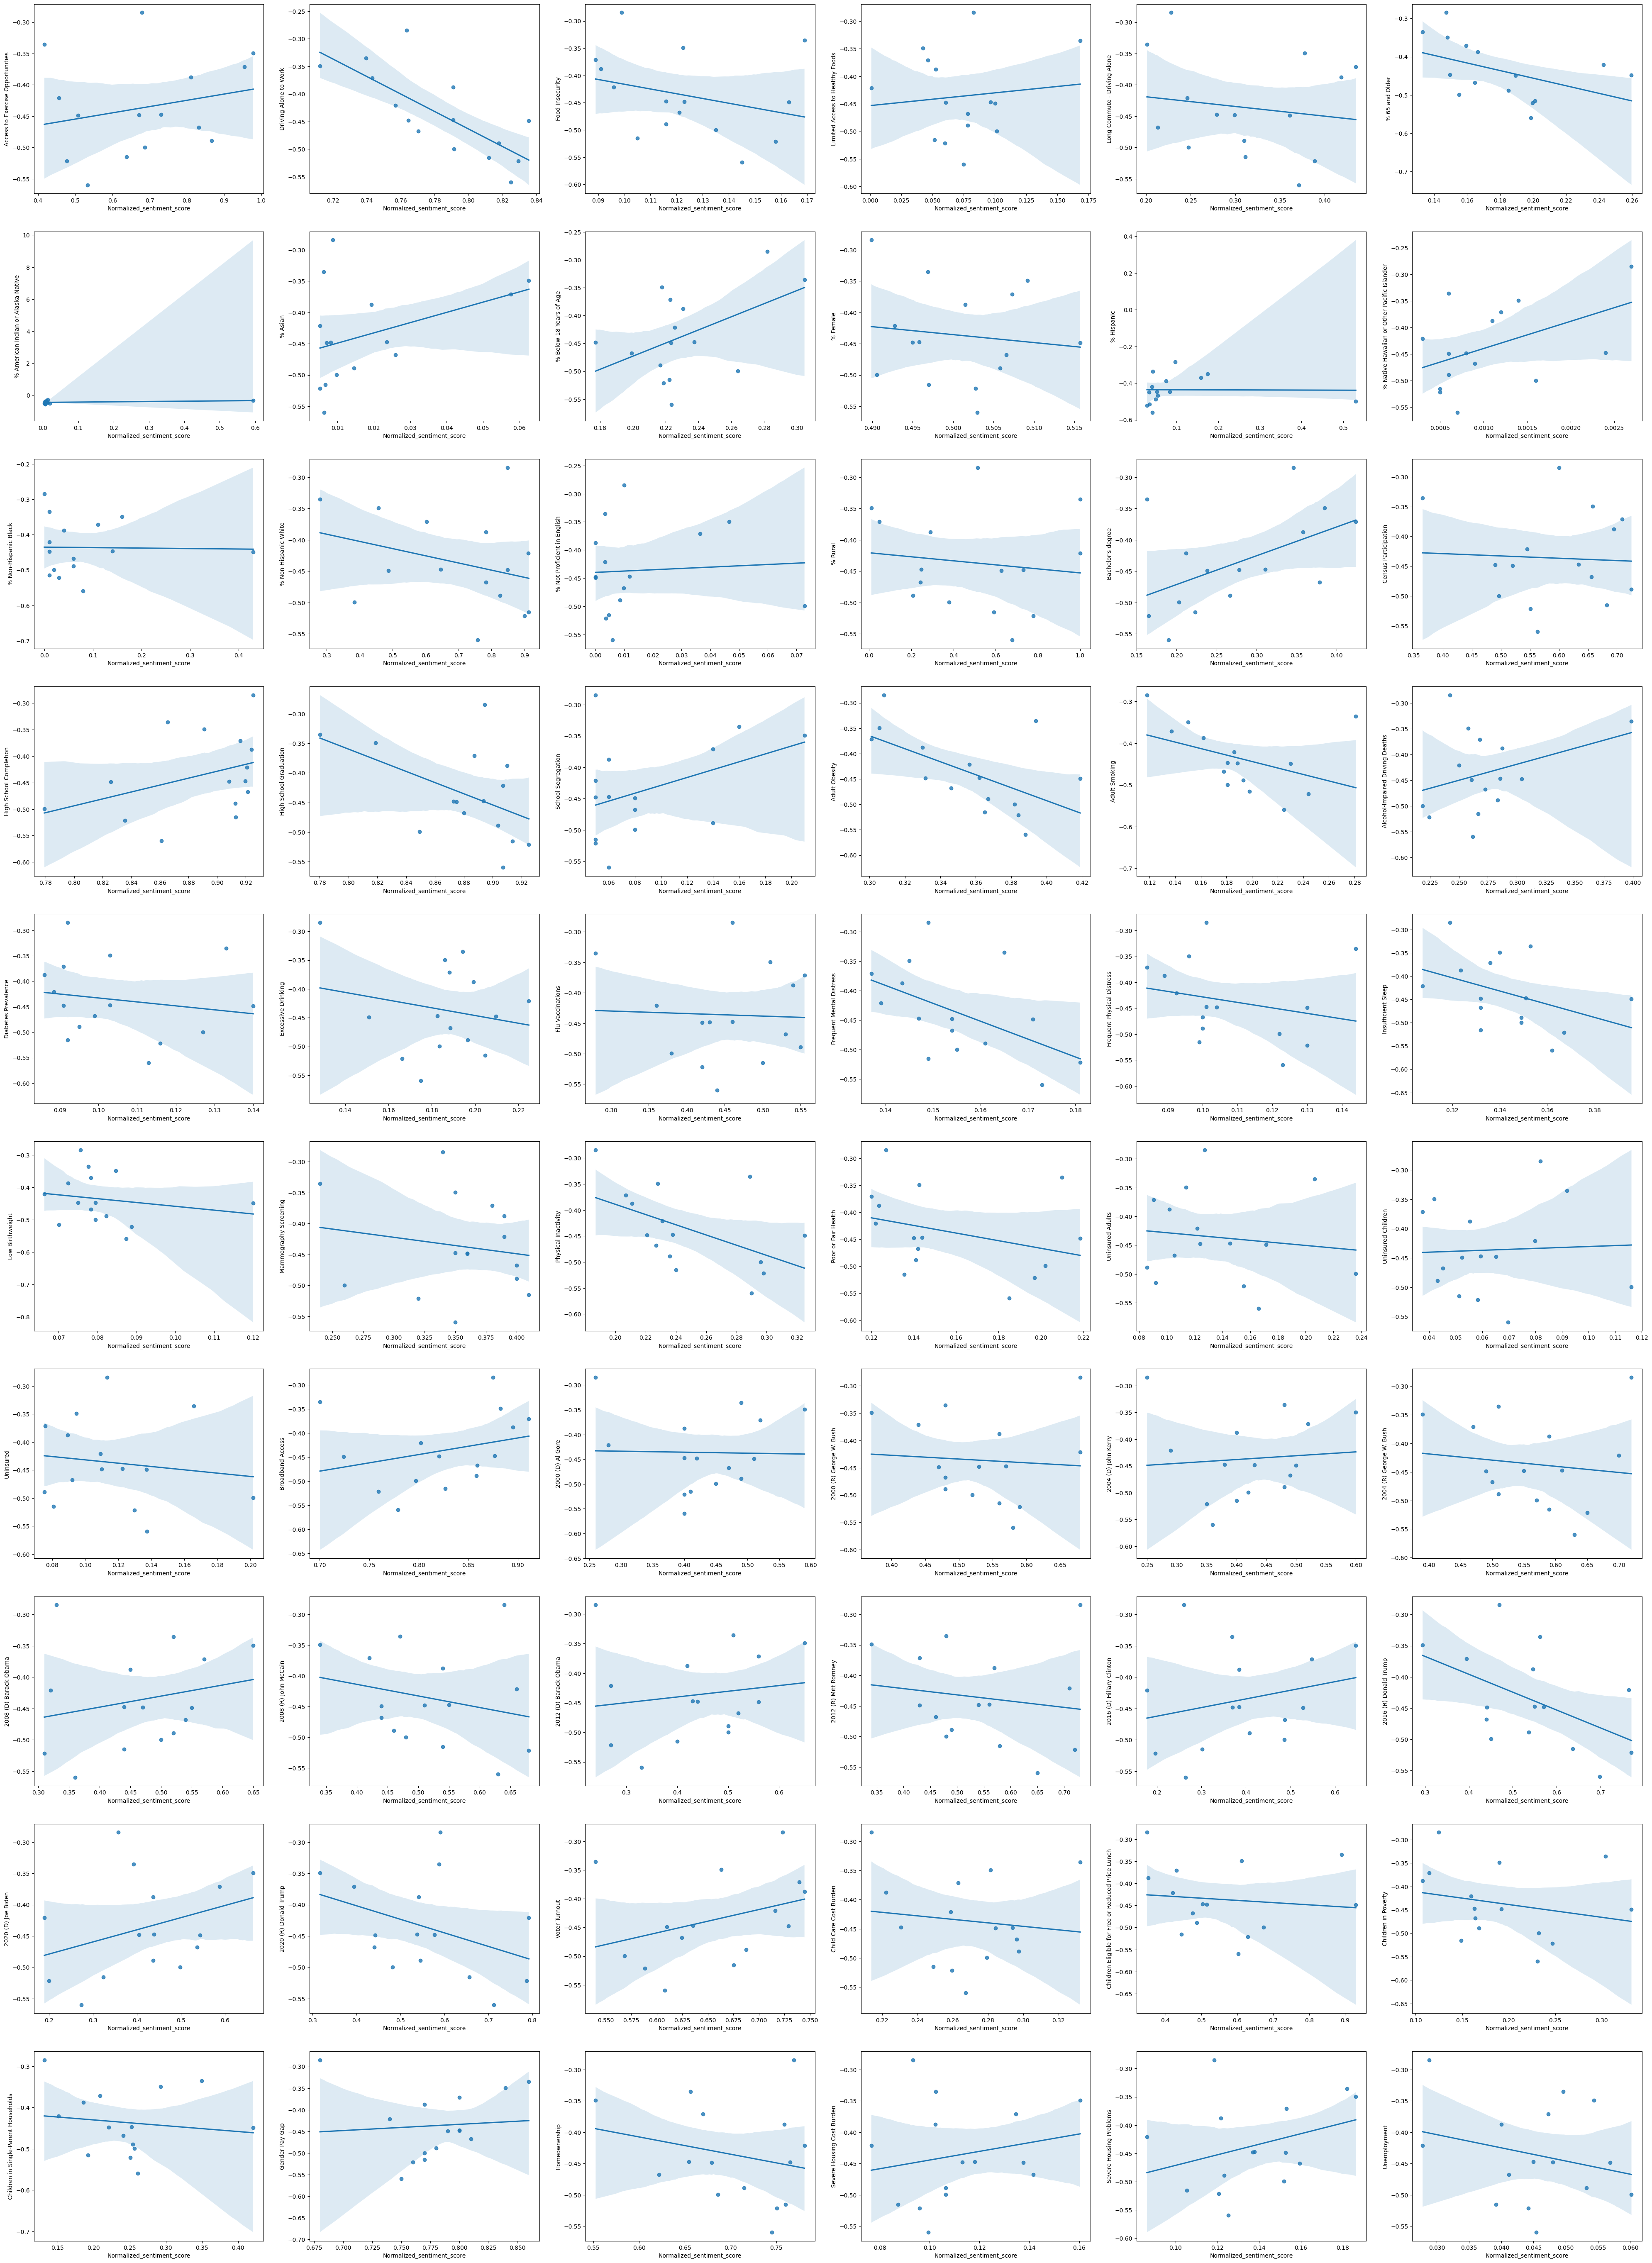

In [40]:
plt.figure(figsize=(50,70))
for i in range(1,61):
    plt.subplot(10, 6, i)
    sns.regplot(x=grouped[numeric[i-1]], y='Normalized_sentiment_score', data=grouped)
    plt.xlabel(to_predict)
    plt.ylabel(numeric[i-1])

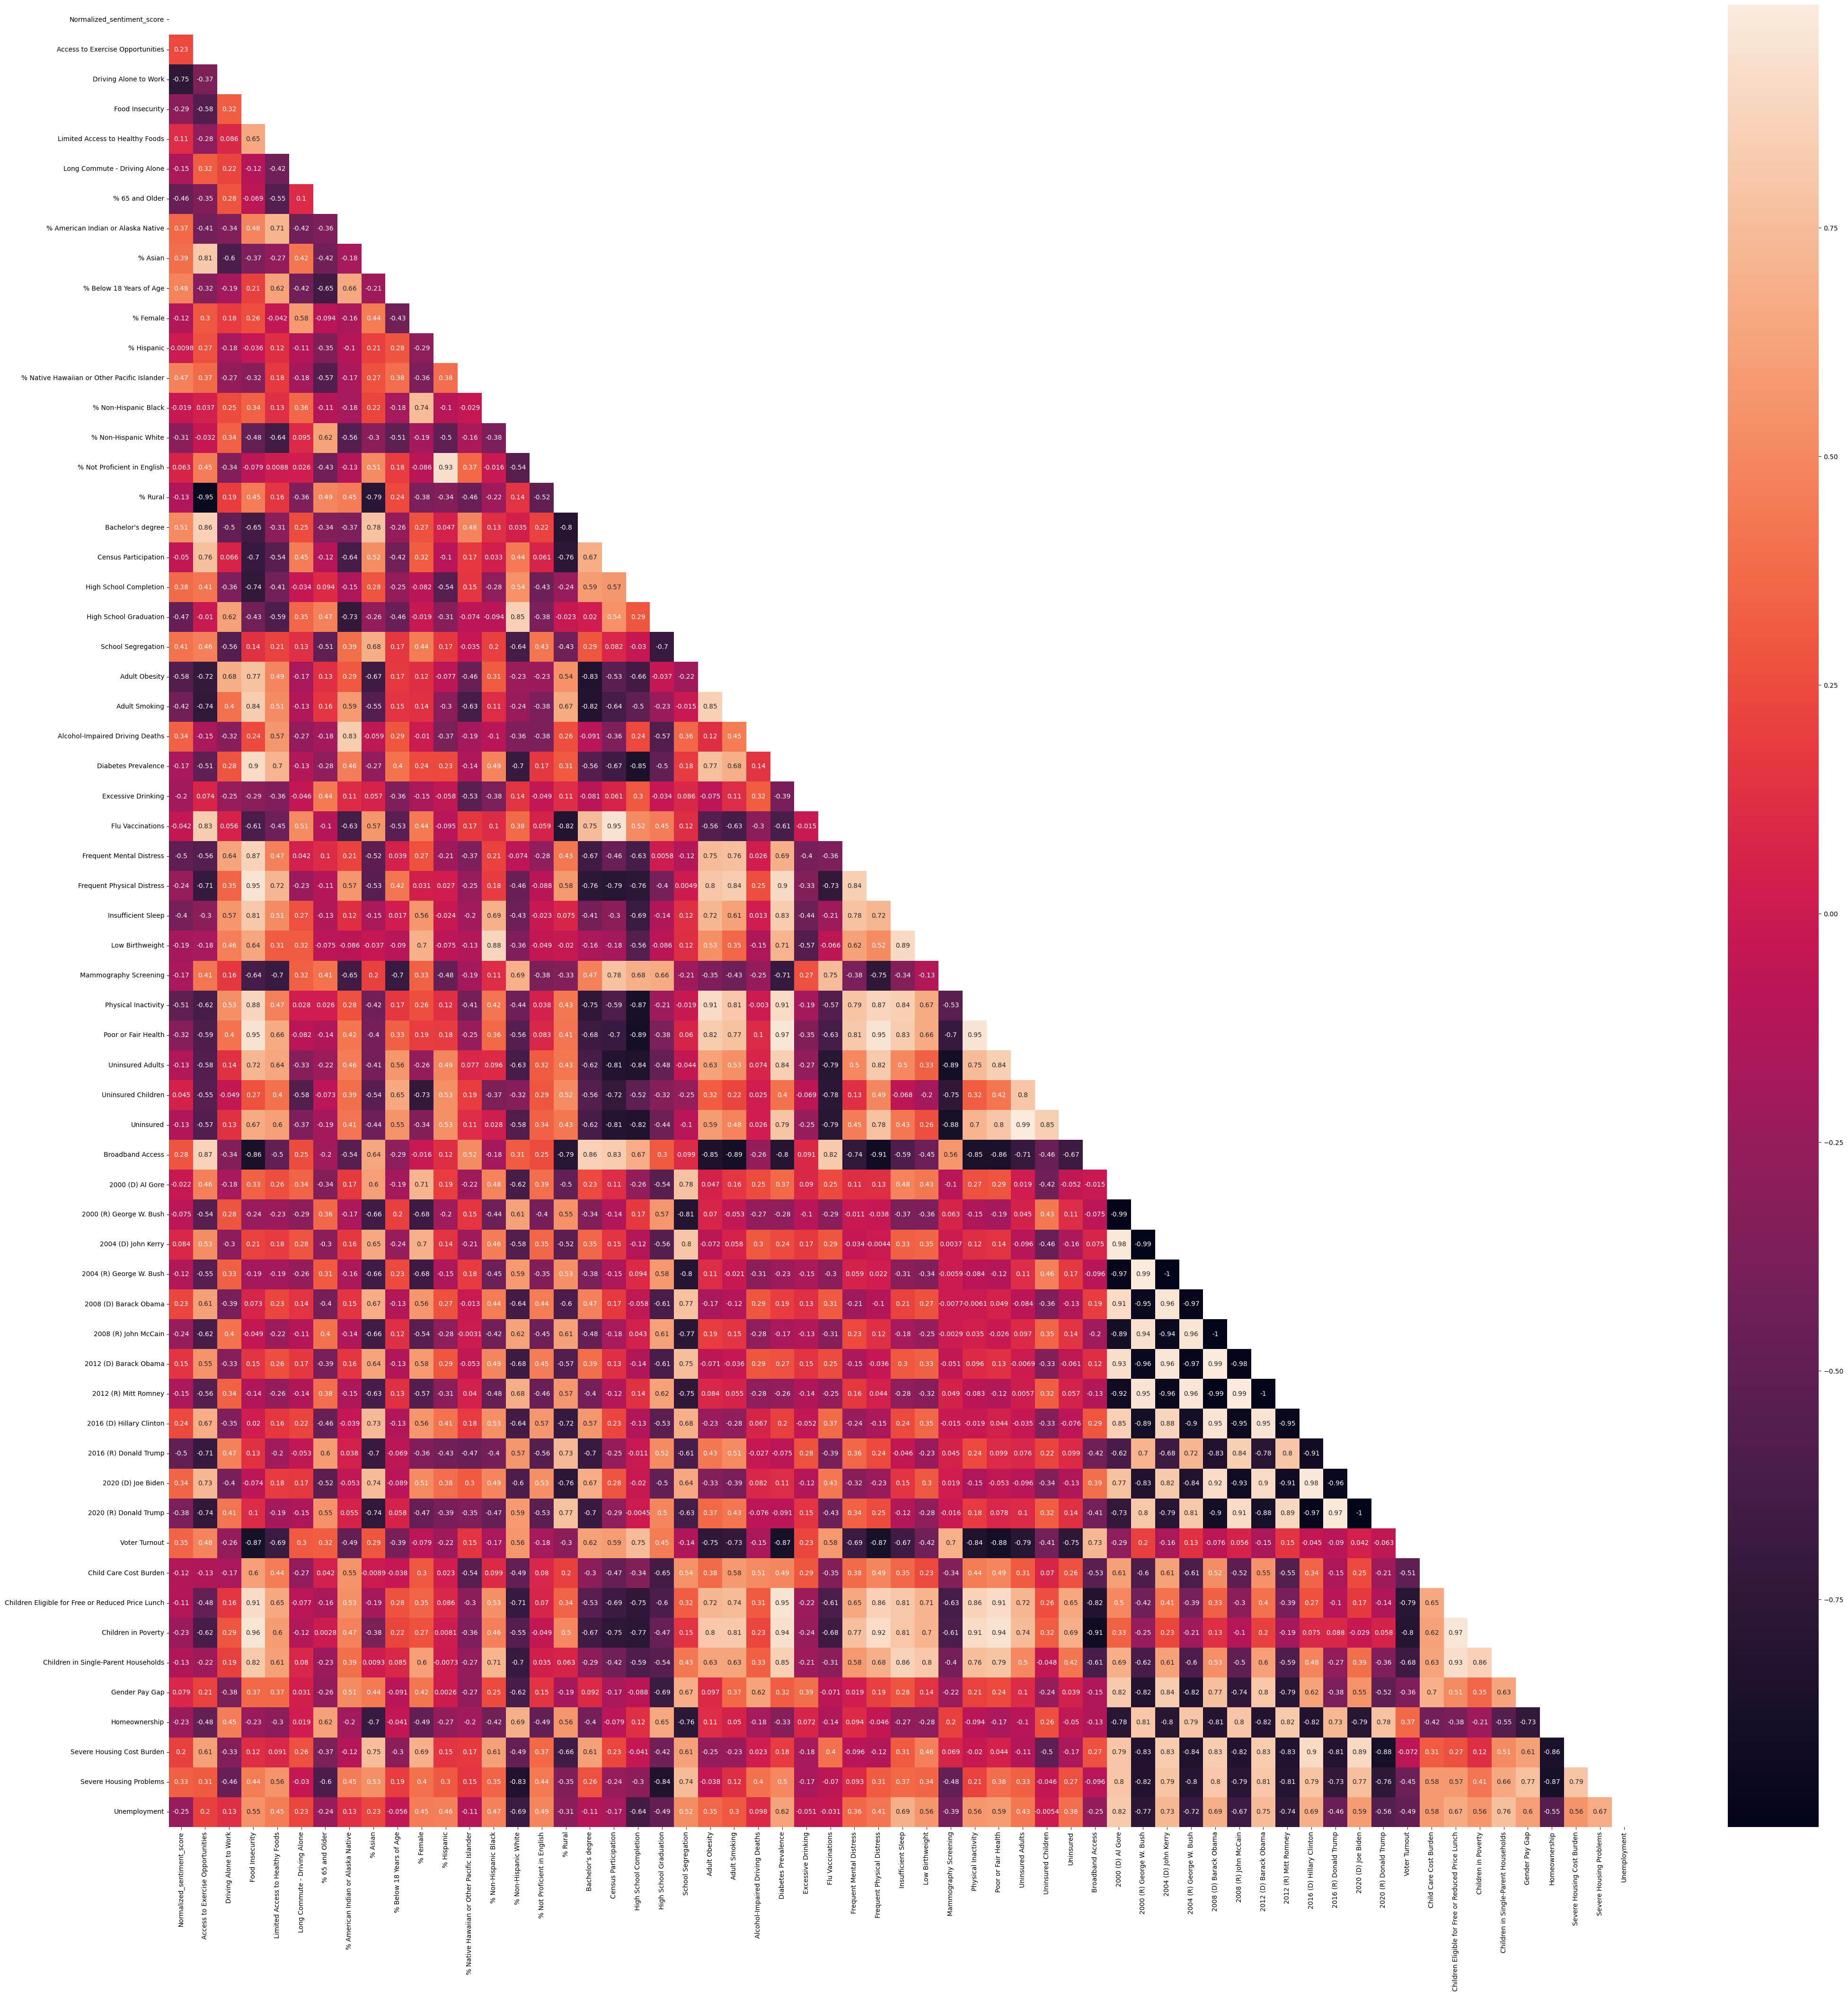

In [48]:
plt.figure(figsize=(50, 50))
corr = grouped.corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(np.ones_like(corr))

# using the upper triangle matrix as mask 
sns.heatmap(corr, annot=True, mask=matrix)
plt.show()

In [49]:
X = grouped.iloc[:,1:].values
y = grouped['Normalized_sentiment_score'].values

In [50]:
# Scaling input data

from sklearn.preprocessing import MinMaxScaler

mscalar = MinMaxScaler()

X_minmax_scaled = mscalar.fit_transform(X)

In [51]:
# Adding constant values at start of array X
X_minmax_scaled = np.append(arr = np.ones((X_minmax_scaled.shape[0], 1)).astype(int), values=X_minmax_scaled, axis=1)

In [53]:
X_lst = list(range(0, X.shape[1]))
X_opt = X_minmax_scaled[:,X_lst]

In [54]:
# Splitting data for taining and testing
X_train, X_test, y_train, y_test = train_test_split(X_opt, y, test_size=0.25, random_state=22)

In [57]:
# Fitting the regressor
regressor_SLR_OLS = sm.OLS(endog = y_train, exog = X_train).fit()

# Looking at the summary of regressor
print(regressor_SLR_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 15 Aug 2023   Prob (F-statistic):                nan
Time:                        21:03:11   Log-Likelihood:                 380.78
No. Observations:                  11   AIC:                            -739.6
Df Residuals:                       0   BIC:                            -735.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0342        inf         -0        n

c:\Users\fashaikh\Desktop\Thesis_main\thesis\.venv\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
c:\Users\fashaikh\Desktop\Thesis_main\thesis\.venv\lib\site-packages\statsmodels\regression\linear_model.py:1765: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\Users\fashaikh\Desktop\Thesis_main\thesis\.venv\lib\site-packages\statsmodels\regression\linear_model.py:1765: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\Users\fashaikh\Desktop\Thesis_main\thesis\.venv\lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


# Just Demographics

In [2]:
df_final = pd.read_parquet(r"C:\Users\fashaikh\Desktop\Thesis_main\final_v2.parquet")
#grouped = df_final.groupby('category').mean()
df_demo = pd.read_csv(r"C:\Users\fashaikh\Desktop\Thesis_main\thesis\acp_data\demographics.csv")
grouped = df_final.merge(df_demo, 'inner', right_on= 'Community', left_on='category')

In [3]:
grouped.columns

Index(['id', 'cleanedContent', 'label', 'category', 'emotion_label', 'text',
       'text_without_stopwords', 'text_lemmatized',
       'text_without_stopwords_freq', 'date', 'rawContent',
       'probability.negative', 'probability.neutral', 'probability.positive',
       'probability.anger', 'probability.anticipation', 'probability.fear',
       'probability.joy', 'probability.optimism', 'probability.sadness',
       'Normalized_sentiment_score', 'emotion_score',
       'Normalized_emotion_score', 'Community', '% 65 and Older',
       '% American Indian or Alaska Native', '% Asian',
       '% Below 18 Years of Age', '% Female', '% Hispanic',
       '% Native Hawaiian or Other Pacific Islander', '% Non-Hispanic Black',
       '% Non-Hispanic White', '% Not Proficient in English', '% Rural',
       'Bachelor's degree', 'Census Participation', 'High School Completion',
       'High School Graduation', 'Math Scores', 'Population Medians',
       'Reading Scores', 'School Funding Adequacy

In [3]:
grouped.drop(columns=['id', 'cleanedContent', 'label', 'category', 'emotion_label', 'text',
       'text_without_stopwords', 'text_lemmatized',
       'text_without_stopwords_freq', 'date', 'rawContent',
       'probability.negative', 'probability.neutral', 'probability.positive',
       'probability.anger', 'probability.anticipation', 'probability.fear',
       'probability.joy', 'probability.optimism', 'probability.sadness', 'Normalized_sentiment_score',
       'Normalized_emotion_score', 'Community'], inplace=True)

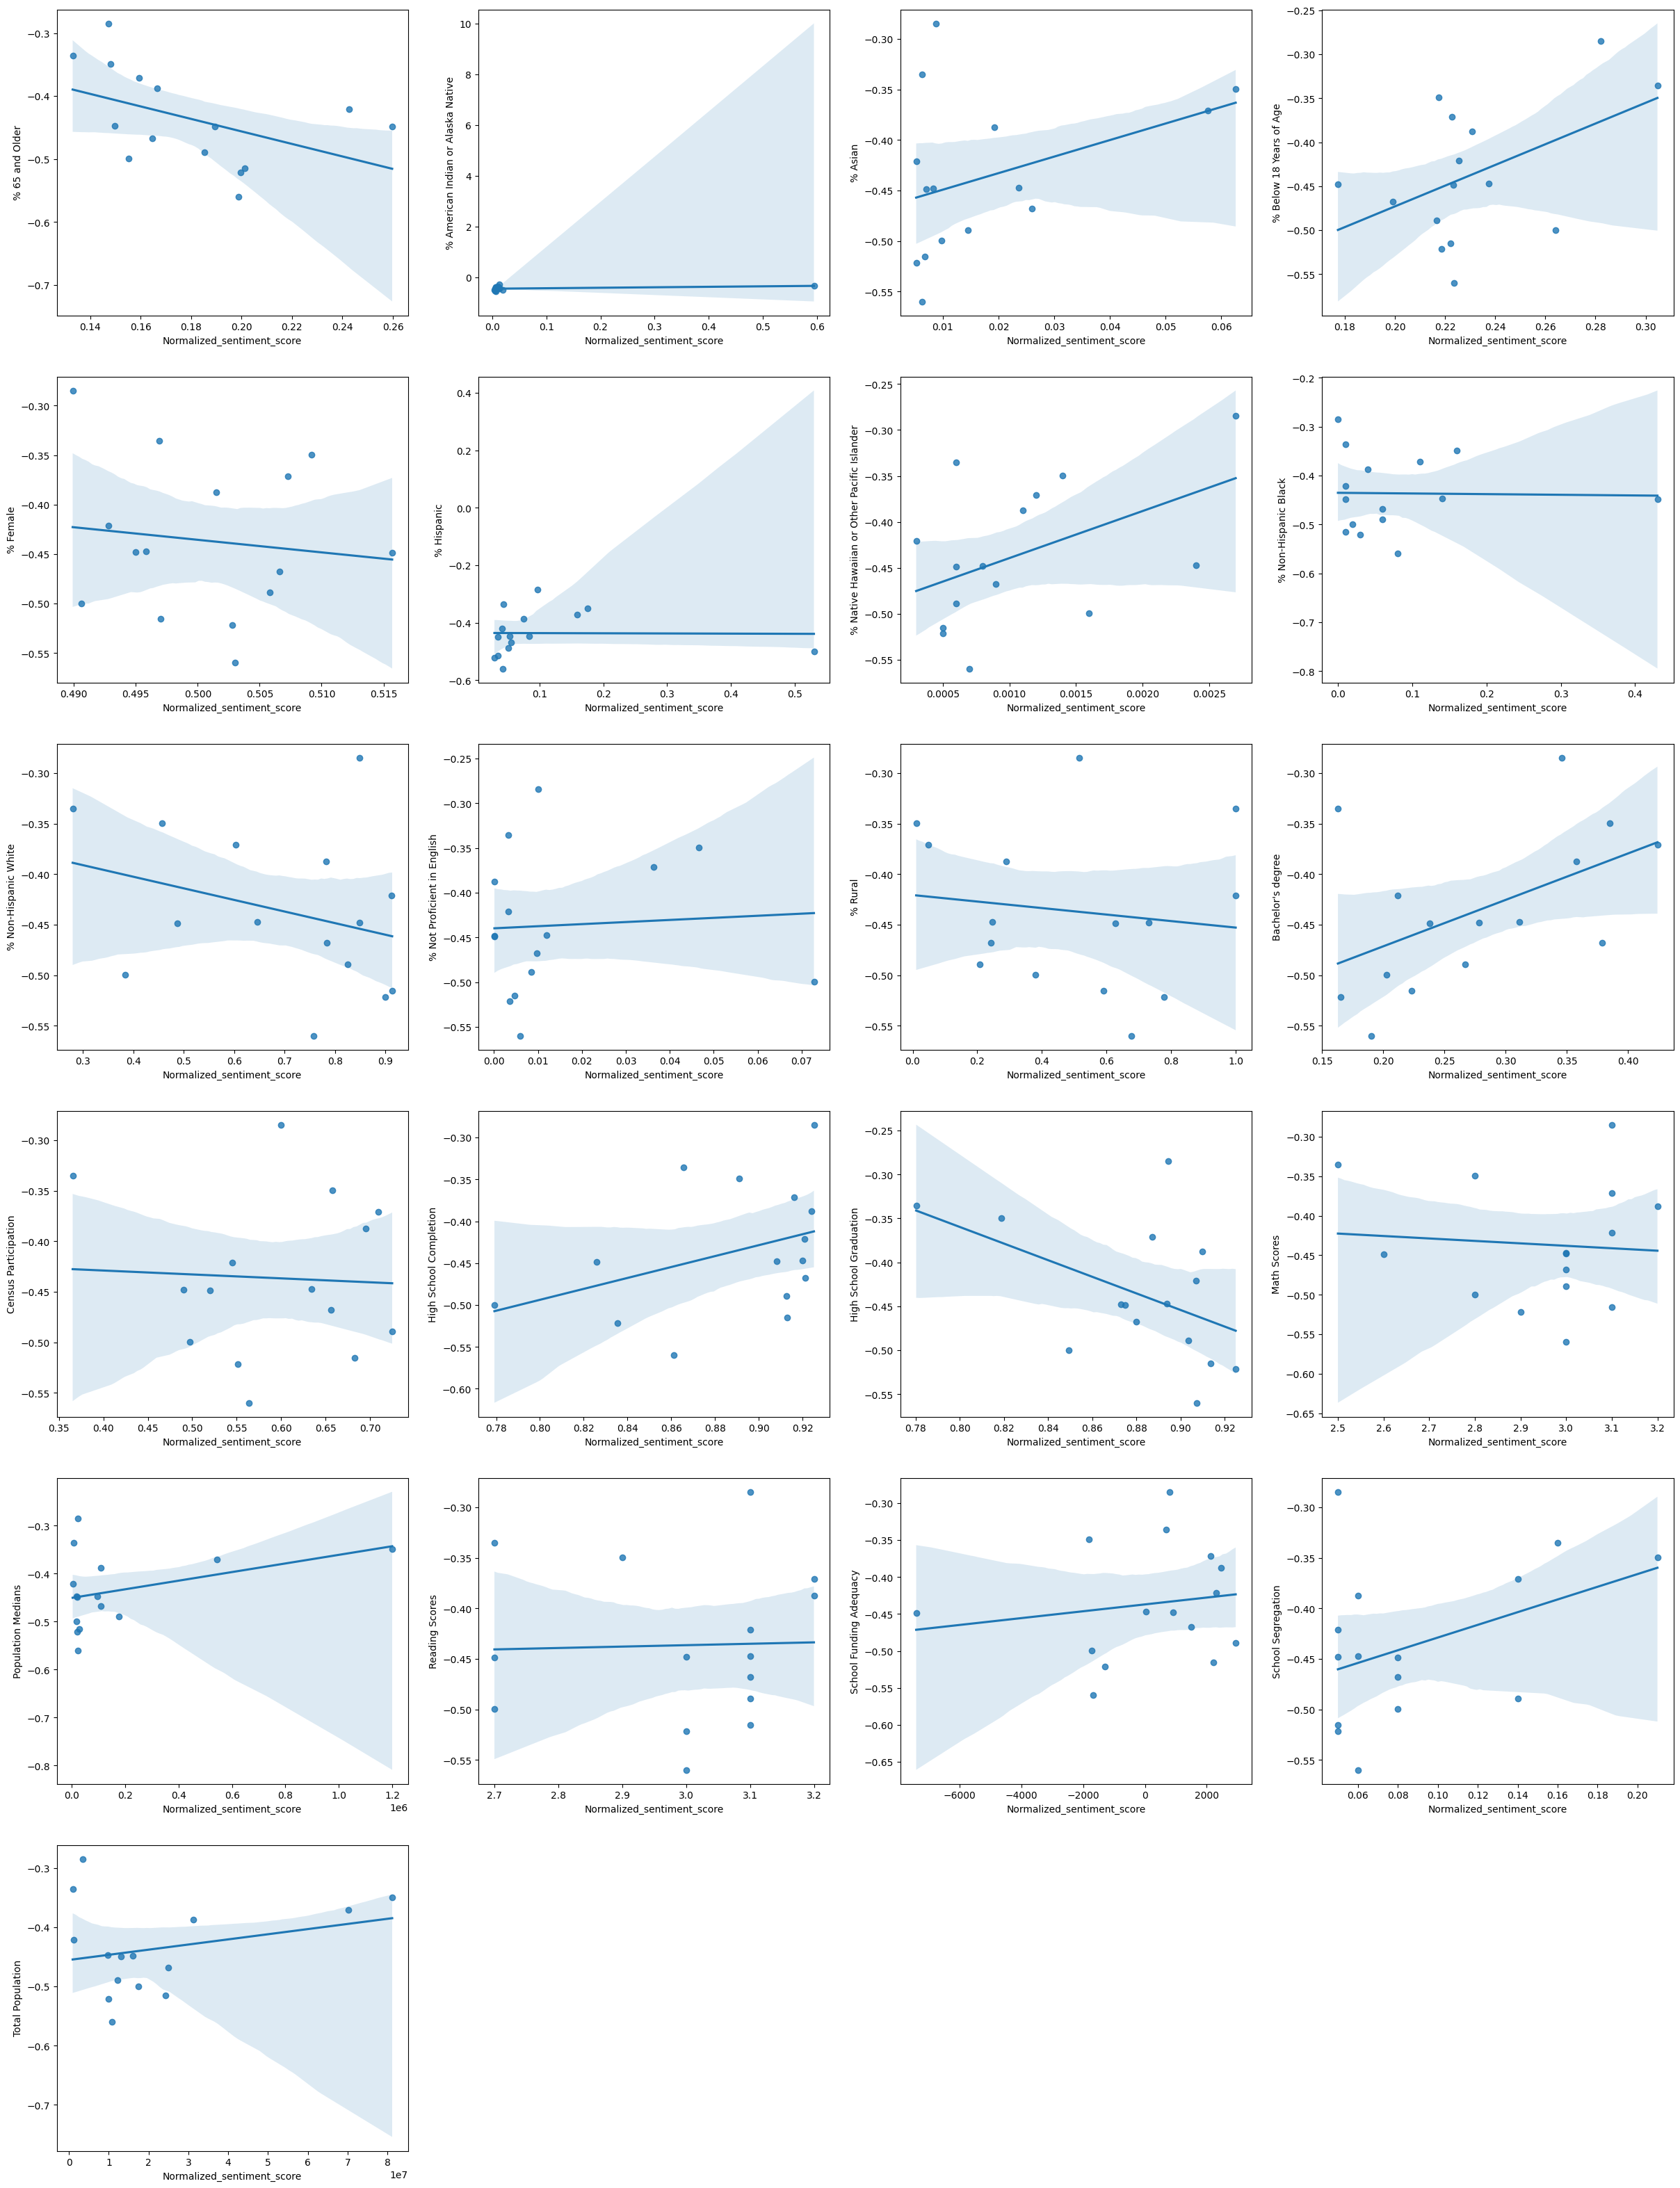

In [9]:
plt.figure(figsize=(30,40))
for i in range(1,22):
    plt.subplot(6, 4, i)
    sns.regplot(x=grouped[numeric[i-1]], y='Normalized_sentiment_score', data=grouped)
    plt.xlabel(to_predict)
    plt.ylabel(numeric[i-1])

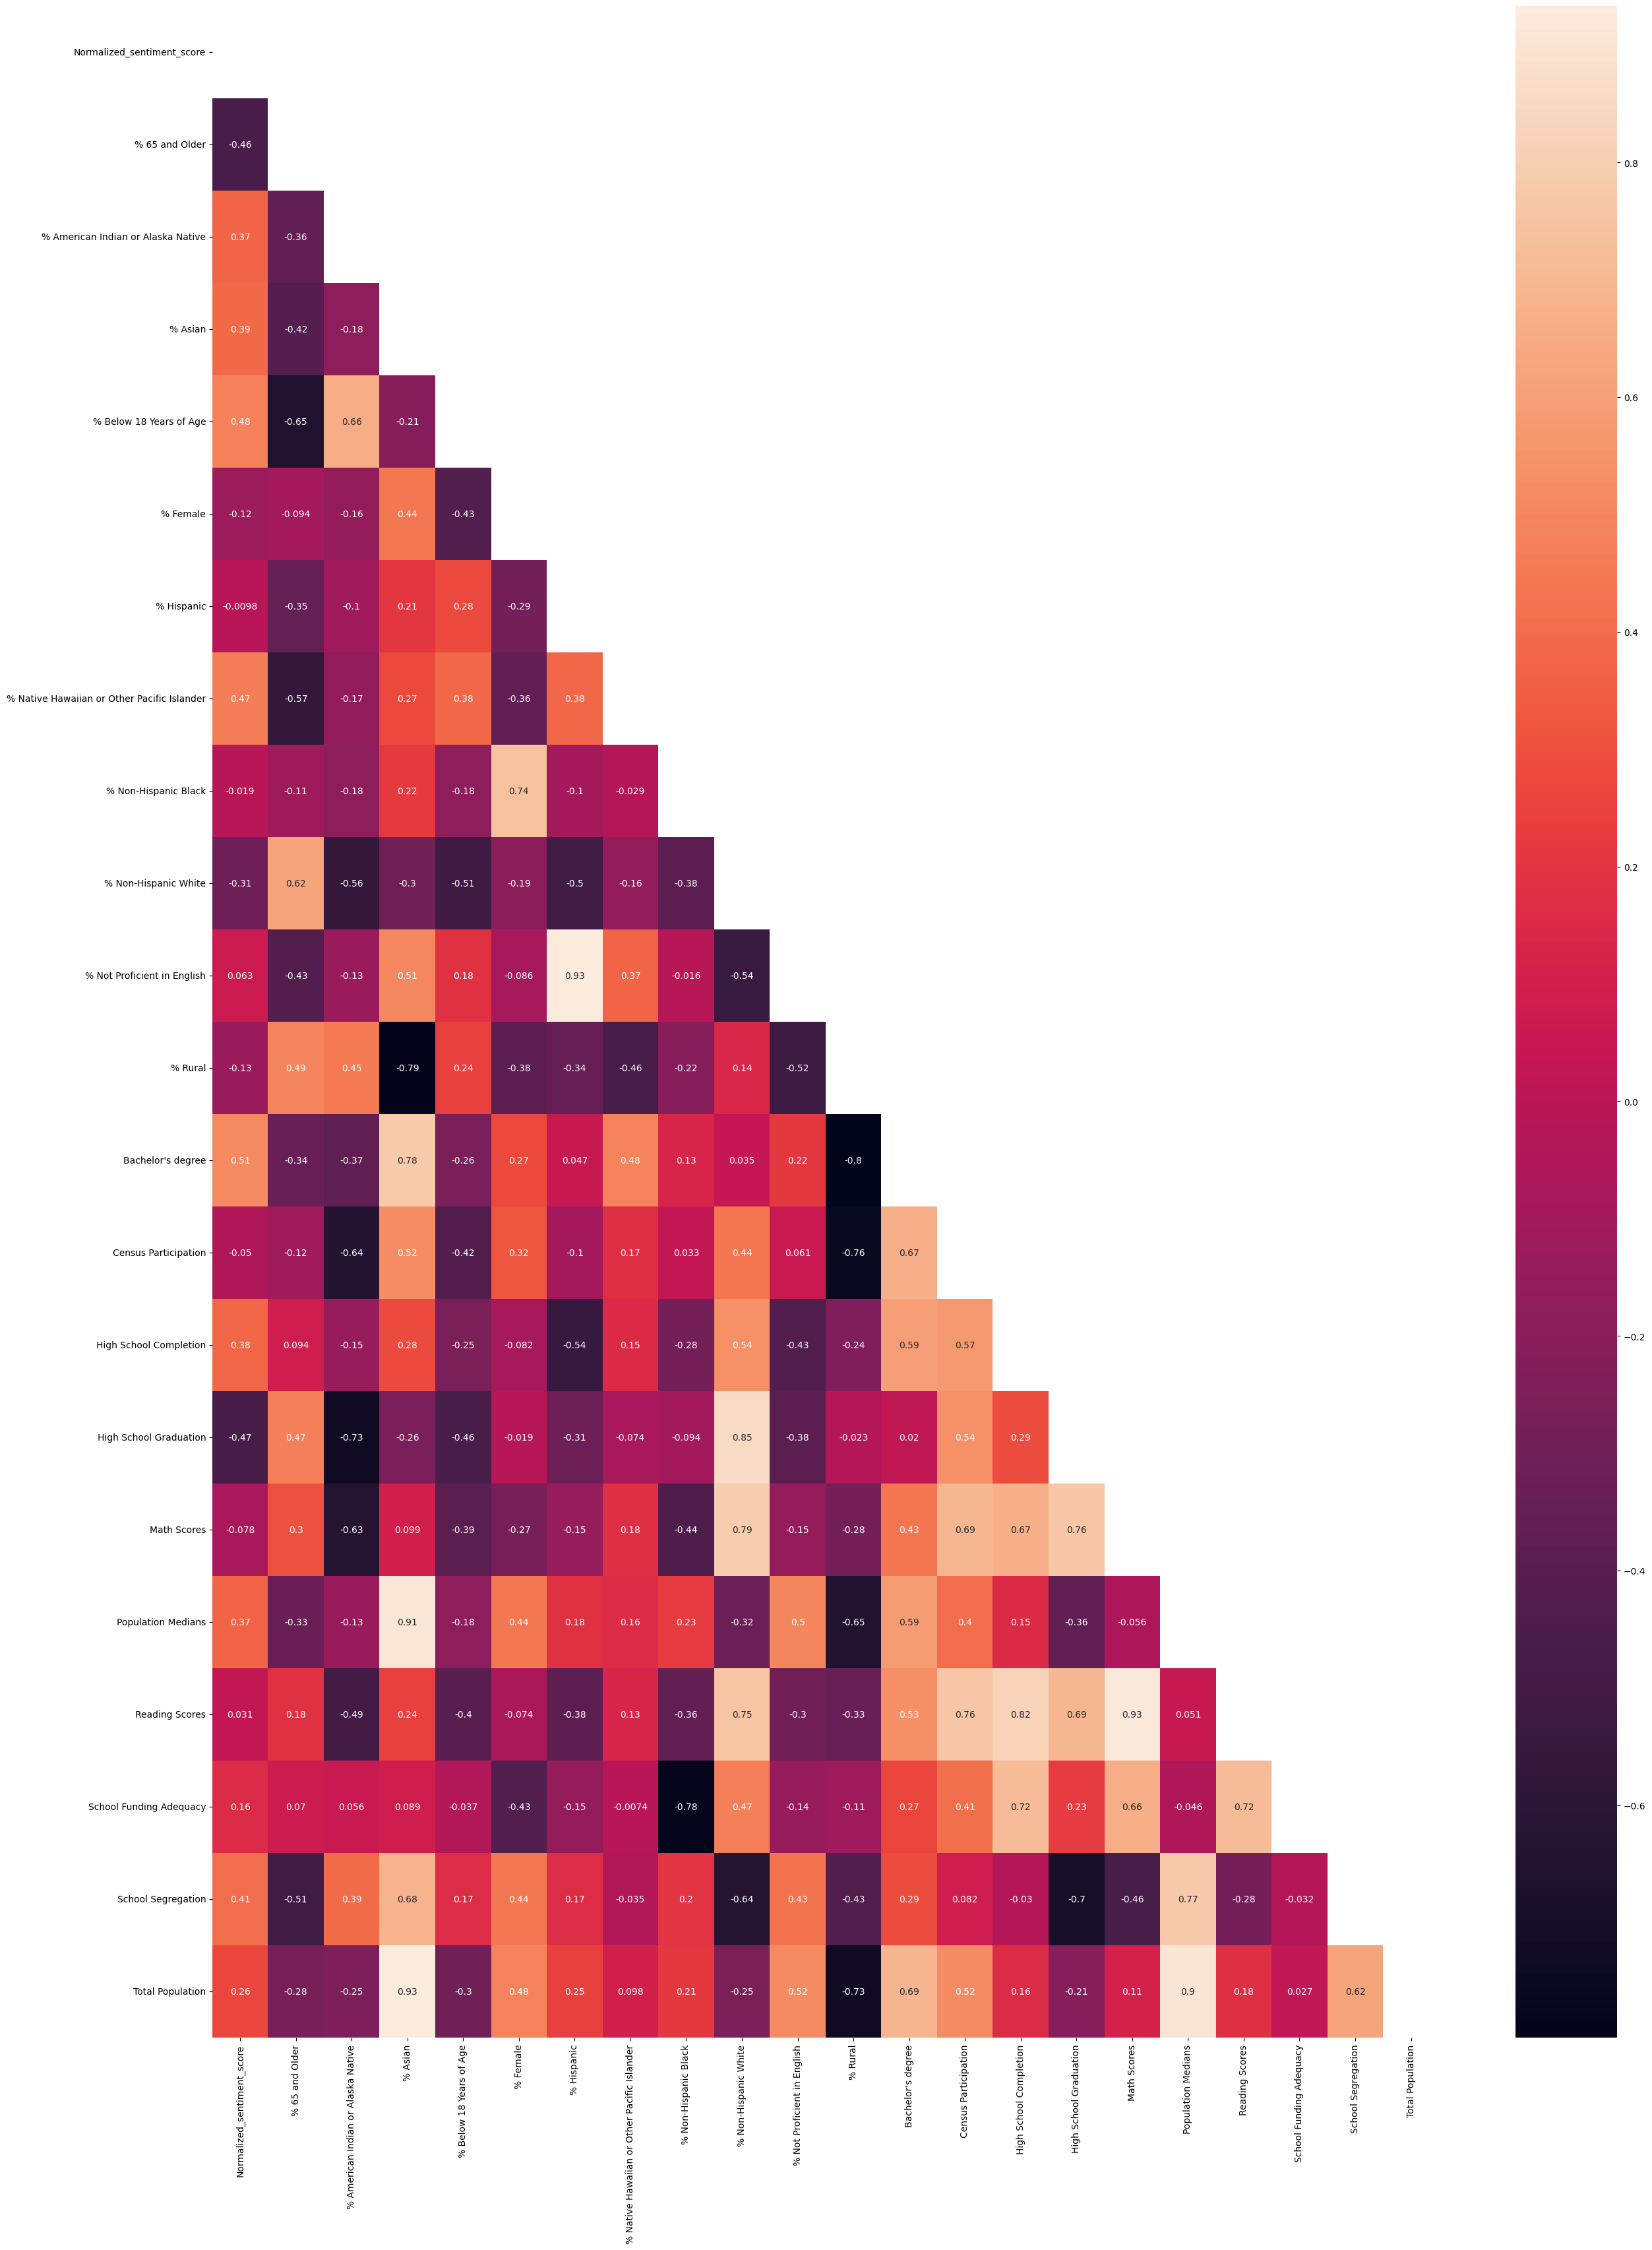

In [10]:
plt.figure(figsize=(30, 40))
corr = grouped.corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(np.ones_like(corr))

# using the upper triangle matrix as mask 
sns.heatmap(corr, annot=True, mask=matrix)
plt.show()

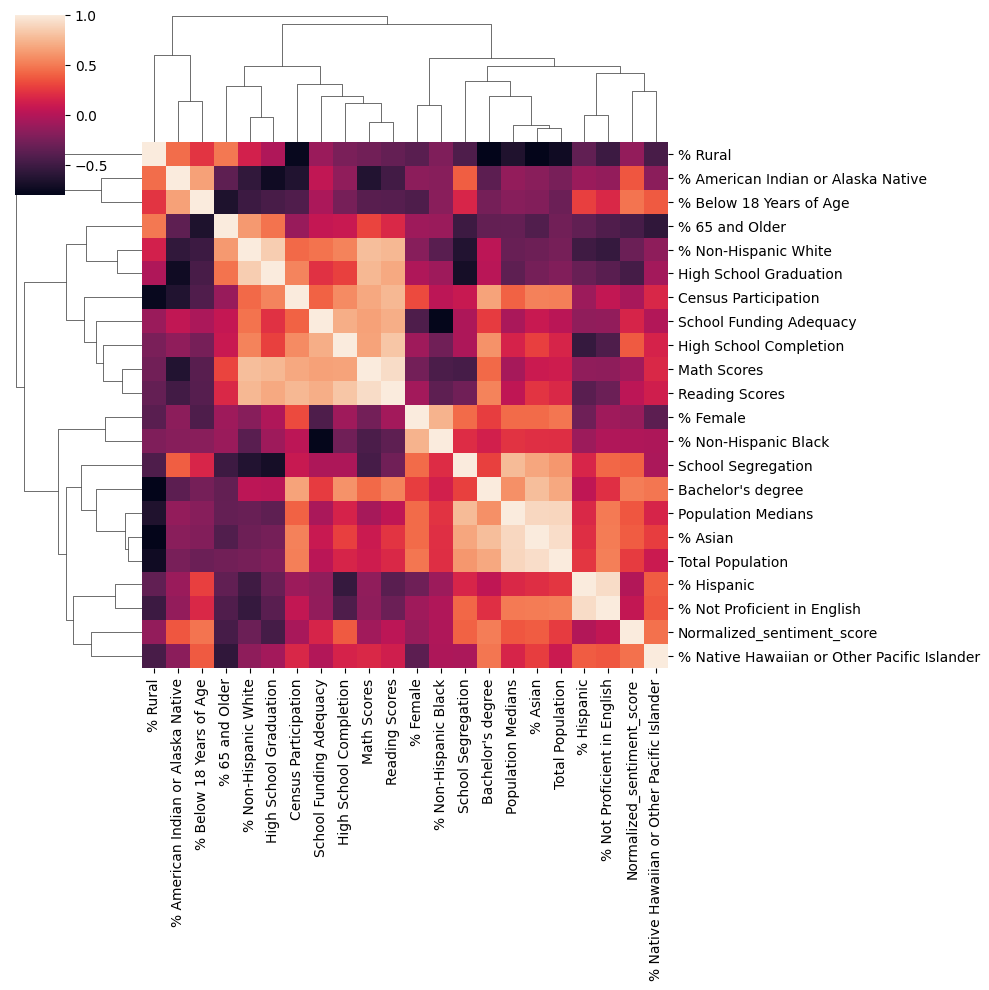

In [17]:
sns.clustermap(corr)

In [4]:
X = grouped.iloc[:,1:].values
y = grouped['emotion_score'].values

In [5]:
# Scaling input data

from sklearn.preprocessing import MinMaxScaler

mscalar = MinMaxScaler()

X_minmax_scaled = mscalar.fit_transform(X)

In [6]:
# Adding constant values at start of array X
X_minmax_scaled = np.append(arr = np.ones((X_minmax_scaled.shape[0], 1)).astype(int), values=X_minmax_scaled, axis=1)

In [7]:
X_lst = list(range(0, X.shape[1]))
X_opt = X_minmax_scaled[:,X_lst]

In [8]:
# Splitting data for taining and testing
X_train, X_test, y_train, y_test = train_test_split(X_opt, y, test_size=0.25, random_state=22)

In [9]:
# Fitting the regressor
regressor_SLR_OLS = sm.OLS(endog = y_train, exog = X_train).fit()

# Looking at the summary of regressor
print(regressor_SLR_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1552.
Date:                Tue, 15 Aug 2023   Prob (F-statistic):               0.00
Time:                        21:39:22   Log-Likelihood:            -7.4233e+05
No. Observations:             3514553   AIC:                         1.485e+06
Df Residuals:                 3514532   BIC:                         1.485e+06
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -2.47e+08   3.36e+08     -0.736      0.4